In [1]:
### DO NOT ALTER OR RUN REPEATEDLY ###
import numpy as np
from math import log10, floor
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def round_sig(x, sig=2):
       return round(x, sig-int(floor(log10(abs(x))))-1)

data = {
        'delta_t':[],
        'Length(m)':[],
        'mu':[],
        'angle(rad)':[],
        'gravity': [],
        'total_time': [],
        'period_time': [],
        'experiment_period_time': [],
        'Difference': []
}
df = pd.DataFrame(data)




### DO NOT ALTER OR RUN REPEATEDLY ###

In [2]:
def period_time_length(delta_t,L,mu,THETA_0,g,t):
    
    
    def get_theta_double_dot(theta,theta_dot,g,L,mu):
        return -mu * theta_dot**2 - (g / L)*np.sin(theta)

    period_count = []
    time_count = 0
    old_time = 0
    theta = THETA_0
    theta_dot = 0
    phase_space_x = []
    phase_space_y = []
    period_num_count = 1
    phase_space_count = []
    for time in np.arange(0, t, delta_t):
        phase_space_x += [theta]
        phase_space_y += [theta_dot]
        phase_space_count += [period_num_count%20]
        time_count += delta_t
        theta_double_dot = get_theta_double_dot(theta, theta_dot,g,L,mu)
        theta += theta_dot * delta_t
        previous_theta_dot = theta_dot
        theta_dot += theta_double_dot * delta_t
        
        if previous_theta_dot > 0 and theta_dot < 0: 
            period_count += [time_count - old_time]
            old_time = time_count
            period_num_count += 1
    
    target = {
            0.48: 1.4282,
            0.38: 1.2994,
            0.35: 1.2122,
            0.27: 1.0744,
            0.24: 1.0088,
            0.21: 0.9042,
            0.13: 0.7704,
            0.08: 0.5732
    }
            
            
    new_data = {
        'delta_t':[delta_t],
        'Length(m)':[L],
        'mu':[mu],
        'angle(rad)':[THETA_0],
        'gravity': [g],
        'total_time': [t],
        'period_time': [np.mean(period_count)],
        'experiment_period_time': [target[L]],
        'Difference': [target[L]-np.mean(period_count)] 
}
    df2 = pd.DataFrame(new_data)
    global df
    df = df.append(df2)    
    #phase_space_x, phase_space_y, phase_space_count
    return target[L]-np.mean(period_count)

In [3]:
df

,delta_t,Length(m),mu,angle(rad),gravity,total_time,period_time,experiment_period_time,Difference


In [4]:
experiment_lengths = [0.48,0.38,0.35,0.27,0.24,0.21,0.13,0.08]
g = 9.80665 #Gravity to 4 significant figures
count = 1
for length in experiment_lengths:
    for mu2 in range(675,690,1):
        period_time_length(0.0001,length,mu2/1000,np.pi/9,9.80665,10)
        print(count)
        count += 1
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 0
Data columns (total 9 columns):
delta_t                   120 non-null float64
Length(m)                 120 non-null float64
mu                        120 non-null float64
angle(rad)                120 non-null float64
gravity                   120 non-null float64
total_time                120 non-null float64
period_time               120 non-null float64
experiment_period_time    120 non-null float64
Difference                120 non-null float64
dtypes: float64(9)
memory usage: 9.4 KB


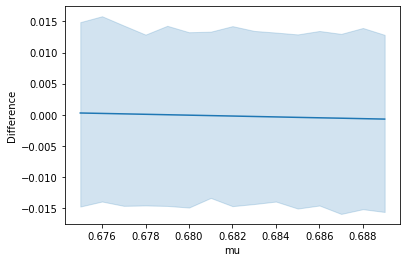

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=df,x='mu',y='Difference')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=df,x='Length(m)',y='Difference')

In [8]:
phase_space_x, phase_space_y, phase_space_count = period_time_length(0.00001,length,0.6,np.pi/9,9.80665,1000)

TypeError: cannot unpack non-iterable numpy.float64 object

In [ ]:
plt.scatter(phase_space_x,phase_space_y)


In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Pendulum Phase Space', fontsize=20)
plt.ylabel('Theta_Dot(rad/s)')
plt.xlabel('Theta(rad)')

ax.scatter(phase_space_x, phase_space_y, alpha=0.20, c= phase_space_count, cmap=cm.flag)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

In [ ]:
df.to_csv('full_data_3.csv')